# Predicting Alcohol Consumption of 15+ Age

### 1. Problem Statement
The main project objective is to forecast the sudden rise of 15 age and above people's alcohol consumption with respect to regions. One of the pillars upon which health policies, resources distribution and interventional planning rely is alcohol rate forecasting. With the help of correct alcohol rates foretellage, the organisation may help states together with NGO's to design appropriate techniques in order to deminish damages relating to booze and distribute means in a more effectual manner.

### Importance of this project
1. Public Health Problems: Drinking less alcoholic drinks can lead to decreased alcohol related health problems among people.
2. Economic Impact: The costs of healthcare can be lessened when alcohol consumption goes down.
3. Social Welfare: Enhanced public governance can increase overall community healthiness.

### Data Collection
We have collected dataset from kaggle platform. (https://www.kaggle.com/datasets/mattop/alcohol-consumption-per-capita-2016). Whereas this dataset is collected by WHO report.

### Expressing as a Machine learning Problem
This problem can be seen as a multiple method of predictions with alcohol consumptionas the target variables. The independent variables will comprise different socio-economics and demographics factors.

### Data Loading

In [32]:
# Below I have mentioned all required libraries tobuild this model.
import pandas as padu
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as present
import seaborn as sasu
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [33]:
# Now  here below I have Loaded the dataset file from my device 
Alcohol_Consumption = padu.read_csv('alcohol-consumption.csv')

# To show first few rows and columns of the my dataset
Alcohol_Consumption.head()


,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6


### Data Exploration

In [38]:
# Now Let's explore the dataset and Check whether there is any missing values or not.
missing_values_of_Alcohol_Consumption = Alcohol_Consumption.isnull().sum()
print("Missing Values in Alcohol Consumption:\n", missing_values_of_Alcohol_Consumption)

#  To collect more details and basic info we have Summary statistics
summary_statistics_of_Alcohol_Consumption = Alcohol_Consumption.describe()
print("Summary Statisticsof Alcohol Consumption:\n", summary_statistics_of_Alcohol_Consumption)

# Now looking after for our target labels we will Drop the 'country' column for correlation matrix calculation
corr_of_Alcohol_Consumption = Alcohol_Consumption.drop(columns=['country'])

# Here we can see the Correlation matrix
correlation_matrix_of_Alcohol_Consumption = corr_of_Alcohol_Consumption.corr()
print("Correlation Matrix of Alcohol Consumption:\n", correlation_matrix_of_Alcohol_Consumption)


Missing Values in Alcohol Consumption:
 country                   0
total_consumption         0
recorded_consumption      0
unrecorded_consumption    0
beer_percentage           0
wine_percentage           0
spirits_percentage        0
other_percentage          0
2020_projection           0
2025_projection           0
dtype: int64
Summary Statisticsof Alcohol Consumption:
        total_consumption  recorded_consumption  unrecorded_consumption  \
count         189.000000            189.000000              189.000000   
mean            6.183598              4.923280                1.379894   
std             4.124949              3.774605                0.891459   
min             0.000000              0.000000                0.000000   
25%             2.400000              1.400000                0.800000   
50%             6.300000              4.500000                1.300000   
75%             9.400000              7.900000                1.800000   
max            16.900000        

### Data Preprocessing and Feature Engineering

In [35]:
# Now after exploring about our data file we will Handling missing values
Alcohol_imputer = SimpleImputer(strategy='median')
Alcohol_Consumption[['beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage']] = Alcohol_imputer.fit_transform(
    Alcohol_Consumption[['beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage']]
)

# Now just by Separating features and target 
Sonu = Alcohol_Consumption.drop(columns=['country', 'total_consumption'])
Monu = Alcohol_Consumption['total_consumption']

# Here we have Normalizing features
scaler = StandardScaler()
Sonu_scaledGroup = scaler.fit_transform(Sonu)


### Data Splitting

In [36]:
# Now to train a model let's split data into Traingroup and testgroup 
Sonu_trainGroup, Sonu_testGroup, Monu_trainGroup, Monu_testGroup = train_test_split(Sonu_scaledGroup, Monu, test_size=0.2, random_state=42)


### Model Training and evaluation by using Decision Tree

In [39]:
# Here I have define Decision Tree model 
Alcohol_Consumption_modelAB = DecisionTreeRegressor()

# As mentioned here I have Defined hyperparameters to tune
param_grid_of_modelAB = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# here qwe have conducted a Grid search for this modelAB 
grid_searchGroup = GridSearchCV(estimator=Alcohol_Consumption_modelAB, param_grid=param_grid_of_modelAB, cv=5, scoring='neg_mean_absolute_error')
grid_searchGroup.fit(Sonu_trainGroup, Monu_trainGroup)

# Now here we are just predicting modelAB
Good_Alcohol_Consumption_modelAB = grid_searchGroup.best_estimator_

# Predicting on testGroup 
Monu_predictGroup = Good_Alcohol_Consumption_modelAB.predict(Sonu_testGroup)

# Evaluation metrics of modelAB
MAE_1 = mean_absolute_error(Monu_testGroup, Monu_predictGroup)
MSE_1 = mean_squared_error(Monu_testGroup, Monu_predictGroup)
R2_1 = r2_score(Monu_testGroup, Monu_predictGroup)

print(f'MAE_1: {MAE_1}')
print(f'MSE_1: {MSE_1}')
print(f'R-squared_1: {R2_1}')

MAE_1: 0.5657894736842103
MSE_1: 0.6207894736842104
R-squared_1: 0.9636758682505645


However, we can see here that decision tree model training accuracy performance is around 96%. Whereas we know that decision tree model training have easy to interpret and visualise as they are good to handleboth categorical and numerical in model.

### Feature Importance of Decision Tree Model

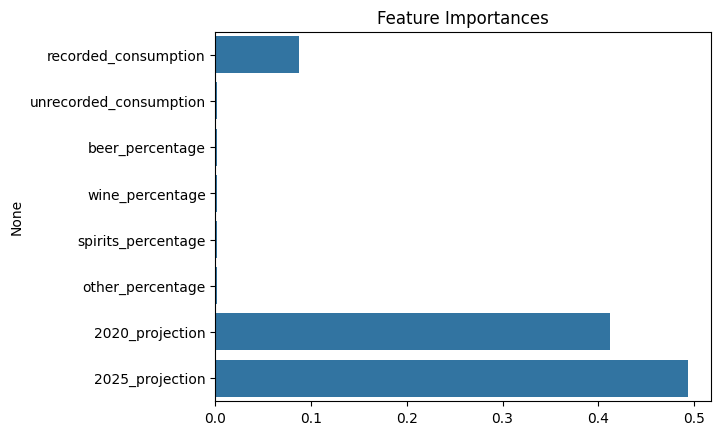

In [40]:
# Feature importance of modelAB
feature_importances_of_Alcohol_Consumption_modelAB = Good_Alcohol_Consumption_modelAB.feature_importances_
sasu.barplot(x=feature_importances, y=X.columns)
present.title('Feature Importances')
present.show()

### Model Training by using SVM

In [41]:
# Here I have defined SVM modelBC
Alcohol_Consumption_modelBC = SVR()

# Define hyperparameters to tune to model BC
param_grid_of_modelBC = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Grid search of this modelBC
grid_searchGroup_of_modelBC = GridSearchCV(estimator=Alcohol_Consumption_modelBC, param_grid=param_grid_of_modelBC, cv=5, scoring='neg_mean_absolute_error')
grid_searchGroup_of_modelBC.fit(X_train, y_train)

# To get nice model
Good_Alcohol_Consumption_modelBC = grid_searchGroup_of_modelBC.best_estimator_

# Predict on testGroup in modelBC
Monu_pred_modelBC = Good_Alcohol_Consumption_modelBC.predict(Sonu_testGroup)

# Evaluation metrics of model BC
MAE_2 = mean_absolute_error(Monu_testGroup, Monu_pred_modelBC)
MSE_2 = mean_squared_error(Monu_testGroup, Monu_pred_modelBC)
R2_2 = r2_score(Monu_testGroup, Monu_pred_modelBC)

print(f'MAE_2: {MAE_2}')
print(f'MSE_2: {MSE_2}')
print(f'R-squared_2: {R2_2}')

MAE_2: 0.15645085420921603
MSE_2: 0.07380901454510531
R-squared_2: 0.9956812277232713


As here, we can see SVM is hihly effective and provides 99% accurate prediction of alcohol comsumption, which may help in policy making and resource allocation.

### Model Training and evaluation by using Random Forest Regression

In [25]:
# Define the model
Alcohol_Consumption_modelCD = RandomForestRegressor()

# Define hyperparameters to tune
param_grid_of_modelCD = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Grid search
grid_searchGroup_of_modelCD = GridSearchCV(estimator=Alcohol_Consumption_modelCD, param_grid=param_grid_of_modelCD, cv=5, scoring='neg_mean_absolute_error')
grid_searchGroup_of_modelCD.fit(Sonu_trainGroup, Monu_trainGroup)

# Best model
Good_Alcohol_Consumption_modelCD = grid_searchGroup_of_modelCD.best_estimator_

print("Model has been trained successfully")

# Predict on test set
Monu_pred_modelCD = Good_Alcohol_Consumption_modelCD.predict(Sonu_testGroup)

# Evaluation metrics
MAE_3 = mean_absolute_error(Monu_testGroup, Monu_pred_modelCD)
MSE_3 = mean_squared_error(Monu_testGroup, Monu_pred_modelCD)
R2_3 = r2_score(Monu_testGroup, Monu_pred_modelCD)

print(f'MAE_3: {MAE_3}')
print(f'MSE_3: {MSE_3}')
print(f'R-squared_3: {R2_3}')


Model has been trained successfully
MAE_3: 0.3817192982456141
MSE_3: 0.3700390478801164
R-squared_3: 0.9783479783446352


### Feature Importance of Random Forest Regression

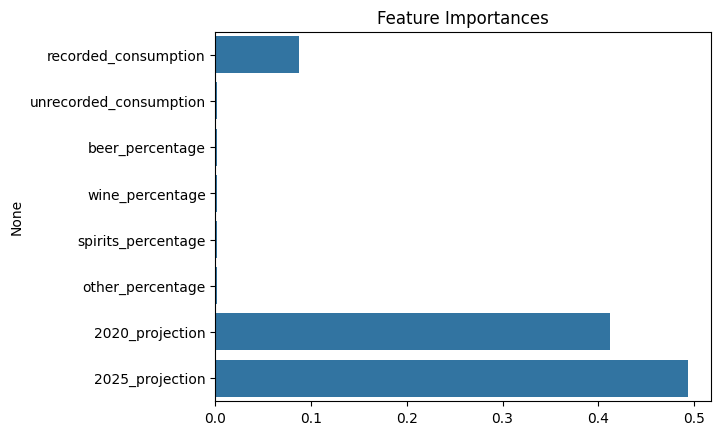

In [30]:
# Feature importance
feature_importances_of_Alcohol_Consumption_modelCD = Good_Alcohol_Consumption_modelCD.feature_importances_
sasu.barplot(x=feature_importances, y=X.columns)
present.title('Feature Importances')
present.show()

### Result
As we can see and understand the accuracy performance of training and evaluation of model by using three diffrent methods differs. Wherein, we found that model performs best in SVM with accuracy performance of 99%. 

### Strengths: 
Therefore, SVM is the strong model for regression tasks with numerous features.

### Limitations: 
However, for maintaining the good performance of the model must be retrained regularly to adjust to recent data.

### Implications for Business Problem:
Informing public health policies and allocation of resources is an important reason for making accurate prediction.

### Recommendations:
Updating the model with respect to time by using latest records and concentrate on crucial elements for tailored responses.

### Model Explainability:
By feature importance visualization, we can understand clearly that what are the factors that mostly influencing alcohol consumption.

### References
1. Cooke, R., Dahdah, M., Norman, P. and French, D.P., 2016. How well does the theory of planned behaviour predict alcohol consumption? A systematic review and meta-analysis. Health psychology review, 10(2), pp.148-167.
2. Lainé, F., Bendavid, C., Moirand, R., Tessier, S., Perrin, M., Guillygomarc'h, A., Guyader, D., Calon, E., Renault, A., Brissot, P. and Turlin, B., 2004. Prediction of liver fibrosis in patients with features of the metabolic syndrome regardless of alcohol consumption. Hepatology, 39(6), pp.1639-1646.